Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "3"
DATE = "24/04/2019"

---

# TP 11 Interpolation
## Exercice 1: Distance parcourue

Le tableau suivant reporte les valeurs de vitesses instantanées mesurées à des intervalles irréguliers lors d’un voyage en vélo. 

| Temps (minutes) | Vitesse (km/h) |
| ---|---|
|2 | 20|
|16|24|
|30|28|
|60|27|
|132 | 23|
|157 |19 |
|195 |18.5 |
|230 |17 |
|242 | 15.8|
| 267 | 15 | 

 1. Representez ces données avec un nuage de points en utilisant la fonction ```scatter()``` du module ```matplotlib.pyplot```.

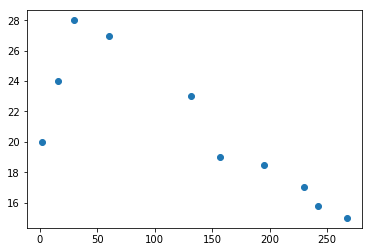

In [8]:
from matplotlib import pyplot as plt
import numpy as np

Temps = [2, 16, 30, 60, 132, 157, 195, 230, 242, 267]
Vitesse = [20, 24, 28, 27, 23, 19, 18.5, 17, 15.8, 15]

fig = plt.figure()
plt.scatter(Temps, Vitesse)

plt.show()

On voudrait connaître la distance totale parcourue pendant la deuxième, troisième et quatrième heure de voyage. Pour ceci il faudrait connaître à tout moment la vitesse moyenne mais celle ci a été enregistrée seulement à certains moments. Il s’agit donc d’abord d’interpoler les données acquises et en suite de procéder à une intégration.
2. Representez maintenant les données en reliant les points par un trait continu. 

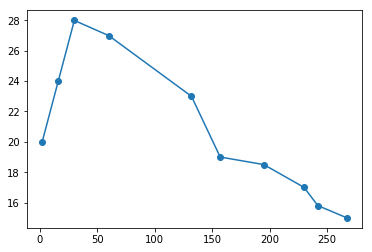

In [5]:
fig = plt.figure()
plt.scatter(Temps, Vitesse)
plt.plot(Temps, Vitesse)
plt.show()

Le graphique que vous venez de tracer à été obtenu grâce à une interpolation linaire par morceaux mais vous ne connaissez pas l'expression de la fonction interpolatrice. Par exemple vous n’avez pas une expression qui vous permet de connaître la vitesse après trois heures de voyage. Pour ceci il s'agit identifier l'intervalle dans lequel est situé un point $x$ quelconque, de définir la droite qui relie les coordonnées des valeurs aux extrémités de cet intervalle et de calculer sur cette droite la valeur $y$ qui correspond au $x$ choisi.
3. Definissez une fonction ```intervalle()``` qui prend en entrée une liste de valeur et un point $t$ et vous retourne l'indice $j$ tel que $t_j < t < t_{j+1}$.

In [51]:
def intervalle(T, t):
    for j in range(0,len(T)-1) :
        if t >= T[j] and t < T[j+1] :
            break
    
    return j
    

In [52]:
intervalle(Temps, 267)

8

4. Créer une fonction ```interp_lin(t,t_i,v_i)``` qui prend pour argument un tableau t de valeurs où l'on cherche l’interpolation, ainsi que $t_i$ et $v_i$ les tableaux de la fonction discrétisée sur n points, et retourne le tableau des valeurs interpolées $\Phi(t)$ :
$$ \Phi(t)=f(t_j)+\frac{t-t_j}{t_{j+1}-t_{j}}(v_{j+1}-v_j) \quad {\rm\ pour\ } t \in [t_j,t_{j+1}]$$
Remarque: on voudrait pouvoir utiliser la fonction ```interp_lin(t,t_i,v_i)``` soit pour des tableaux de valeurs, soit pour un temps donné. Il est possible que dans votre définition de fonction vous deviez itérer sur la variable t. Dans ce cas, si on rentre une simple valeur numérique et pas un tableau (ou une liste), on obtient une erreur du type : 'int' object is not iterable. Pour contourner ce problème vous pouvez à l’intérieur de la fonction transformer t en une liste mais il faut le faire seulement si le type de t n’a pas un iterateur déjà défini : il ne faut pas faire de listes de listes ou des listes de arrays ! La fonction ```transform()``` définie dans la cellule suivante vous permet de faire cette transformation. Si necessaire, vous pourrez l’appeler dans la definition de votre fonction  ```interp_lin(t,t_i,v_i)```.

In [18]:
def transform(obj):
    if not hasattr(obj, "__iter__"):
        obj = [obj]
    return obj

In [19]:
def interp_lin(t, t_i, v_i) :
    t = transform(t)
    phi = []
    
    for x in t :
        j = intervalle(t_i, x)
        
        f= v_i[j]+((x-t_i[j])/(t_i[j+1]-t_i[j]) * (v_i[j+1]- v_i[j]))
        phi.append(f)
        
    return phi

5. Calculez maintenant par interpolation linéaire les coordonnées de 200 points entre le temps minimum et maximum des données expérimentales. A l'aide de la fonction ```scatter()``` représentez les données originelles ainsi que les valeurs obtenues par interpolation. Quelle était la vitesse après deux heures de voyage ? Et après trois heures ?

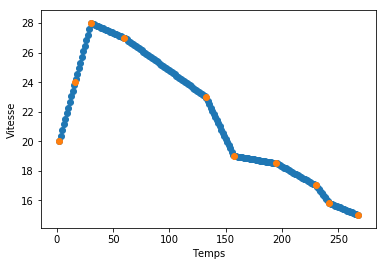

In [25]:
T= np.linspace(Temps[0],Temps[-1], 200)

y = interp_lin(T,Temps, Vitesse)

fig= plt.figure()
plt.scatter(T, y)
plt.scatter(Temps, Vitesse)
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.show()

6. On peut maintenant calculer la distance parcourue pendant la troisième heure de voyage. Pour ceci vous pouvez utiliser la méthode des trapèzes : faire des trapèzes revient à faire une interpolation linéaire entre point successifs! Vous pouvez construire une liste des vitesse mesurées dans l’intervalle choisi en ajoutant les points aux extrêmes de l'intervalle temporel que vous avez obtenus grâce à la fonction ```interp_lin(t,t_i,v_i)``` à la fin de question precedente (remarque: contrôler de ne pas mélanger listes et valeurs numériques).

In [31]:
from scipy import integrate

T= np.linspace(120,180, 200)
y = interp_lin(T, Temps, Vitesse)
y_int = integrate.trapz(y, T)/60

print(y_int)

20.642005542567816


L’utilisation d’une interpolation linéaire a le désavantage de ne pas garantir la continuité de la dérivée première. Quelle était l’accélération du vélo au moments où les mesures ont été effectuées? Il est ainsi convenable d’utiliser d'autres méthodes d’interpolation qui permettent d’obtenir des courbes lisses.
Nous allons chercher un polynôme $\phi$ de degré $n$ passant par tous les points ($x_i , y_i = f(x_i)$). Ce polynôme peut être le polynôme interpolateur de Lagrange qui a la forme suivante:

$$ \Phi(x)= \sum_{i=0} f(x_i) l_i(x)$$

où $l_i(x)$ est le polynôme de Lagrange:
$$l_i(x)=\prod_{j \neq i}  \dfrac{(x-x_j)}{(x_i-x_j)} $$
7. Créer une fonction renvoyant la valeur du i-ème polynôme de Lagrange $l_i(x)$. La fonction prendra en entrée le tableau de valeurs $x_i$, l'entier $i$ et la valeur $x$.  

In [47]:
def l_i(Xi, i, x):
    
    h= 1
    
    for j in range(0, len(Xi)):
        if j == i :
            continue
        h= h * (x-Xi[j])/(Xi[i]-Xi[j])
        
    return h

8. Choisissez deux valeurs $x_0$ et $x_1$ et tracer sur un même graphe les deux polynômes de Lagrange associés à l’intervalle $x_0-x_1$.

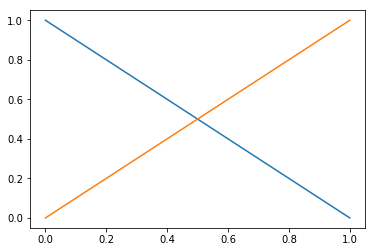

In [48]:
x0= 0
x1= 1

X= np.linspace(x0,x1, 200)

y0= l_i([x0,x1],0, X)
y1= l_i([x0,x1],1, X)


plt.plot(X,y0)
plt.plot(X,y1)
plt.show()


9. Créer une fonction ```lagrange_interp(x, x_i, y_i)``` calculant le polynôme interpolateur de Lagrange à partir de $x$, des tableaux $x_i$ et $y_i$.

In [59]:
def lagrange_interp(x, x_i, y_i):
    
    x= transform(x)
    r= np.zeros_like(x)
    
    for i in range(0, len(y_i)):
        r += y_i[i]*l_i(x_i,i,x)
    return r
        
        

10. Représentez sur un même graphique les valeurs mesurées de vitesse en fonction du temps ainsi que polynôme interpolateur de Lagrange obtenu à partir de ce tableau.

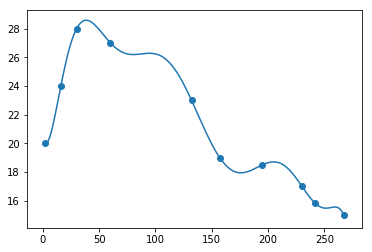

In [64]:
X = np.linspace(Temps[0], Temps[-1], 200)
Y = lagrange_interp(X, Temps, Vitesse)

plt.plot(X, Y)
plt.scatter(Temps,Vitesse)
plt.show()

11. Calculer maintenant la distance parcourue pendant la troisième heure de voyage. On pourra intégrer le polynôme interpolateur de Lagrange obtenu en utilisant la fonction ```quad()``` du module ```scipy.integrate```.

In [68]:
T= np.linspace(120,180, 200)
y = lagrange_interp(T, Temps, Vitesse)
y_int = integrate.trapz(y,T)/60

print(y_int)

20.476785357450595


## Exercice 2: Phénomène de Runge

Dans cet exercice on s’intéresse à comment une fonction peut être bien représentée par un polynôme interpolateur de Lagrange et aux problèmes que l'on peut rencontrer aux limites.
1. Definir la fonction $f_1(x)=1/(1+K x^2)$ où $K$ est un paramètre. Représenter cette fonction dans l’intervalle $[-1,1]$ en choisissant K=10.

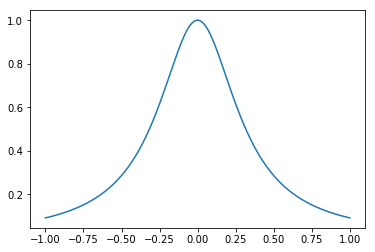

In [70]:
def f1(x, K):
    return 1/(1+K*x**2)

X= np.linspace(-1,1,200)
Y= f1(X,10)

fig = plt.figure()
plt.plot(X, Y)
plt.show()
    

2. Générer un tableau de $n=20$ points $x_i$ répartis régulièrement dans l'intervalle $[-1,1]$ et un tableau $y_i=f_1(x_i)$ avec K=10. 

In [71]:
Xi = np.linspace(-1, 1, 20)
Yi = f1(Xi, 10)


Vous pouvez imaginer que lors d’une expérience vous avez mesuré ces points mais que *a priori* vous ne connaissez pas la fonction qui relie les $y_i$ aux $x_i$. Il s’agit donc d’interpoler les données et pour ceci vous pouvez utiliser la fonction ```lagrange_interp()``` que vous avez définie dans l’exercice précédent. 
3. Représentez sur un même graphique la fonction originelle, les 20 points choisi et le polynôme interpolateur de Lagrange.

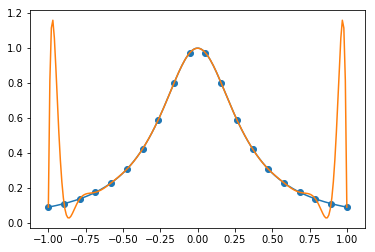

In [74]:
X= np.linspace(-1,1,200)
Y_int = lagrange_interp(X, Xi, Yi)

fig= plt.figure()
plt.plot(X, Y)
plt.scatter(Xi, Yi)
plt.plot(X, Y_int)
plt.show()

4. Reprendre la question précédente avec des abscisses $x_i$ répartis de la manière suivante : $$ x_i=\cos \left[\frac{(2i+1)\pi}{(2n+1)}\right]$$ où $n$ est à nouveau le nombre de points $x_i$.  Que constatez vous ?  

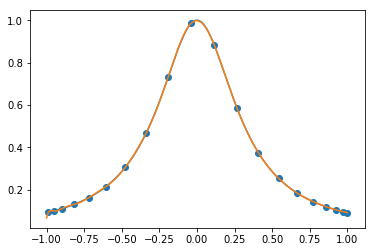

In [76]:
n= 20
Xi = np.array ([np.cos((2*i+1)*np.pi/(2*n+1)) for i in range(n) ])
Yi = f1(Xi, 10)

X= np.linspace(-1,1,200)
Y_int = lagrange_interp(X, Xi, Yi)

fig= plt.figure()
plt.plot(X, Y)
plt.scatter(Xi, Yi)
plt.plot(X, Y_int)
plt.show()

## Exercice 3: Les montagnes russes

1. Comme dans l'exercice précédent, tracer sur une même figure la fonction $f_2: f_2(x)=(1 + x^2 -x^4)\exp(-x^2/2)$ sur l'intervalle $[-4,4]$, 10 points régulièrement espacés sur cet intervalle, et le polynôme interpolateur de Lagrange correspondant. 

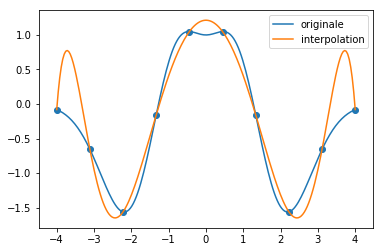

In [99]:
def f2(x) : 
    return (1+ x**2 - x**4)*np.exp(-x**2/2)

X= np.linspace(-4,4,200)
Y= f2(X)

Xi = np.linspace(-4, 4, 10)
Yi = f2(Xi)

Y_int = lagrange_interp(X, Xi, Yi)

fig= plt.figure()
plt.plot(X, Y, label = 'originale')
plt.scatter(Xi, Yi)
plt.plot(X, Y_int, label = 'interpolation')
plt.legend()
plt.show()

Le calcul d'une courbe "spline" vous sera expliqué l'année prochaine, mais leur utilisation est relativement aisée. Par exemple, si ```x``` est un tableau à valeurs finement espacées et $(x_i, y_i)$ sont les points à interpoler, le code suivant fournit les valeurs interpolées ```y_spline``` en ```x``` (i.e. un tableau de même taille que ```x```) :
```python
from scipy import interpolate
tck = interpolate.splrep(xi, yi)
y_spline = interpolate.splev(x, tck)
```
2. Superposer une interpolation par 'spline' à votre figure précédente. Sur quel tracé de montagnes russes seriez vous prêts à vous engager ?

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()